### Hexbin Plot (Hexagonal Bin Plot)
- 데이터가 클 때 각각의 점을 산점도(Scatter Plot)로 표현할 때의 단점을 보완할 수 있는 그래프
- 육각형 모양의 Bin을 생성하여 그래프로 표현
  - 데이터의 크기 비교 가능
- Histogram과 산점도를 혼합한 형태

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl

%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])   # 1000개 행과 2개 열
df['b']

0     -1.854617
1     -0.339434
2     -0.489531
3     -0.526792
4      0.369112
         ...   
995    0.356414
996   -0.952941
997    0.588598
998    0.409856
999    1.397590
Name: b, Length: 1000, dtype: float64

<AxesSubplot:xlabel='a', ylabel='b'>

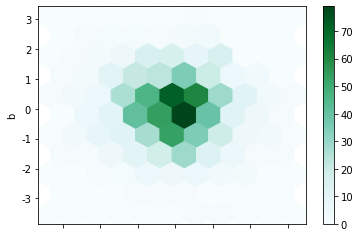

In [8]:
df.plot.hexbin(x='a', y='b', gridsize=10)
# gridsize: 격자의 size(크기)를 조절 가능

<AxesSubplot:xlabel='a', ylabel='b'>

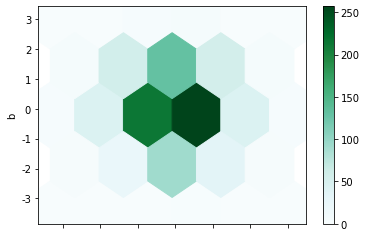

In [9]:
df.plot.hexbin(x='a', y='b', gridsize=5)

In [11]:
df['z'] = np.random.uniform(0, 3, 1000)  # 0~3 범위에서 1000개 무작위 추출
df['z']

0      2.479729
1      0.088777
2      0.901070
3      2.421948
4      2.019847
         ...   
995    2.603408
996    2.607945
997    2.533938
998    2.892700
999    0.993439
Name: z, Length: 1000, dtype: float64

<AxesSubplot:xlabel='a', ylabel='b'>

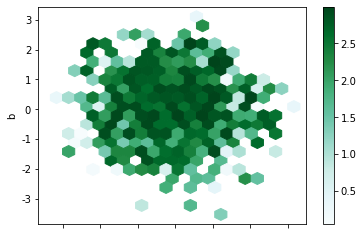

In [12]:
df.plot.hexbin(x='a', y='b', C='z',
              reduce_C_function = np.max, gridsize=20)

- 기본적으로 각 (x,y) 점 주변의 개수에 대한 히스토그램이 계산됨
- C 및 reduce_C_function 인수에 값을 전달하여 대체 집계를 지정할 수 있음
- C는 각(x,y) 점에서 값을 지정하고 reduce_C_function은 Bin의 모든 값을 단일 숫자로 줄이는 하나의 인수의 함수  
  예) 평균, 최대값, 합계, 표준 ~ 예에서의 위치는 열(Column) a 및 b에 의해 주어지며, 값은 열(z)애 의해 주어짐
- Bin은 NumPy의 max함수로 집계됨

<AxesSubplot:xlabel='a', ylabel='b'>

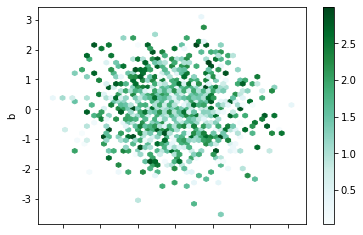

In [14]:
df.plot.hexbin(x='a', y='b', C='z',
              reduce_C_function = np.median, gridsize=50)

<AxesSubplot:xlabel='a', ylabel='b'>

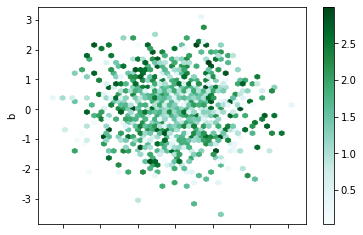

In [15]:
df.plot.hexbin(x='a', y='b', C='z',
              reduce_C_function = np.mean, gridsize=50)